# Univariate response model with interaction terms

Machine information 

In [1]:
versioninfo()

Julia Version 1.4.1
Commit 381693d3df* (2020-04-14 17:20 UTC)
Platform Info:
  OS: macOS (x86_64-apple-darwin18.7.0)
  CPU: Intel(R) Core(TM) i5-6267U CPU @ 2.90GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-8.0.1 (ORCJIT, skylake)


## Data

Suppose we have the following variables:

* `y`: $324$-by-$1$ vector of phenotype of interest 
* `X`: $324$-by-$1$ vector indicating sex of each individual 
* `G`: $150$-by-$1$ vector whose $i$-th element is a $324$-by-$q_i$ genotype matrix (matrix of A2 allele counts) for gene $i,$ where $i=1,\ldots, 150$ and $q_i$ is the number of variants for gene $i$
* `trtvec`: $324$-by-$1$ vector indicating treatment status of each individual. 

These variables are saved in `.jld2` file. First, read in variables using `JLD2` package. 

In [3]:
using JLD2
@load "/Users/juhyun-kim/Box Sync/workspace/vcselect/data/VCSEL/SNPset_interaction.jld2" y y2 X G V trtvec

┌ Info: Precompiling JLD2 [033835bb-8acc-5ee8-8aae-3f567f8a3819]
└ @ Base loading.jl:1260


6-element Array{Symbol,1}:
 :y
 :y2
 :X
 :G
 :V
 :trtvec

Our phenotype vector: 

In [4]:
y

324-element Array{Float64,1}:
 -0.40911273847444835
 -0.0597995644528963
  0.02798994878695149
 -0.5810287222548617
  0.4325440331155418
  0.048256153207898195
 -0.27027696763685594
  0.10490944338119751
 -0.7799009563553139
 -0.20593444247247622
  0.5520065403740653
 -0.10092686337307819
  0.5983104367265357
  ⋮
  0.03739468023738035
  0.47352506877371714
 -0.22836115042409924
 -0.3876214190551975
  0.10326243849550518
 -0.4882830145406528
 -0.06903684417417116
  0.09798041795966334
 -0.1480073641765541
 -0.29900800903355274
 -0.008878790322644575
 -0.09571535379121696

Covariate matrix indicating sex:

In [5]:
X

324-element Array{Float64,1}:
 1.0
 2.0
 2.0
 1.0
 2.0
 1.0
 2.0
 2.0
 2.0
 1.0
 2.0
 1.0
 1.0
 ⋮
 1.0
 1.0
 2.0
 2.0
 2.0
 1.0
 1.0
 2.0
 1.0
 1.0
 1.0
 2.0

Vector of genotype matrix for each gene: 

In [6]:
G

150-element Array{Array{Float64,2},1}:
 [2.0 0.0 … 2.0 2.0; 2.0 1.0 … 1.4485981308411215 2.0; … ; 2.0 0.0 … 1.0 2.0; 2.0 0.0 … 2.0 2.0]
 [2.0 2.0 … 2.0 2.0; 2.0 1.0 … 1.0 0.0; … ; 2.0 1.0 … 1.0 0.0; 2.0 2.0 … 1.0 2.0]
 [2.0 2.0 … 0.0 2.0; 2.0 2.0 … 2.0 2.0; … ; 2.0 2.0 … 1.0 2.0; 2.0 2.0 … 0.0 1.0]
 [2.0 1.0 … 0.0 2.0; 2.0 1.0 … 0.0 2.0; … ; 2.0 0.0 … 1.0 2.0; 1.0 1.0 … 1.0 2.0]
 [1.0 2.0 … 0.0 2.0; 1.0 2.0 … 1.0 2.0; … ; 0.0 2.0 … 1.0 2.0; 2.0 2.0 … 0.0 2.0]
 [2.0 2.0 … 1.0 2.0; 2.0 2.0 … 1.0 2.0; … ; 2.0 2.0 … 1.0 2.0; 2.0 2.0 … 1.0 2.0]
 [2.0 1.0 … 1.0 2.0; 2.0 1.0 … 1.0 2.0; … ; 2.0 2.0 … 0.0 2.0; 2.0 2.0 … 1.0 2.0]
 [1.0 1.0 … 1.0 1.0; 1.0 2.0 … 1.0 0.0; … ; 2.0 2.0 … 2.0 1.0; 2.0 2.0 … 2.0 1.0]
 [2.0 2.0 … 2.0 0.0; 2.0 1.0 … 1.0 0.0; … ; 1.0 2.0 … 2.0 0.0; 2.0 2.0 … 2.0 1.0]
 [2.0 2.0 … 2.0 1.0; 2.0 2.0 … 2.0 1.0; … ; 2.0 2.0 … 2.0 1.0; 2.0 0.0 … 2.0 1.0]
 [1.0 2.0 … 2.0 2.0; 0.0 1.0 … 2.0 2.0; … ; 2.0 1.0 … 2.0 2.0; 1.0 0.0 … 1.0 2.0]
 [2.0 0.0 … 2.0 2.0; 2.0 2.0 … 1.0 2.0; … ; 

Elements in `G` are matrices of size $324\times q_i.$ Number of rows must be the same (n=324) because each row is for each individual. On the other hand, number of columns vary because number of SNPs/variants vary from gene to gene. Here we list different sizes elements of `G` have: 

In [7]:
unique(size.(G))

8-element Array{Tuple{Int64,Int64},1}:
 (324, 44)
 (324, 27)
 (324, 47)
 (324, 14)
 (324, 42)
 (324, 29)
 (324, 30)
 (324, 18)

Vector of treatment status:

In [8]:
trtvec

324-element Array{Int64,1}:
 0
 0
 0
 0
 1
 1
 0
 1
 0
 1
 1
 1
 1
 ⋮
 1
 1
 0
 0
 0
 0
 1
 0
 0
 0
 0
 1

Let us create a diagonal matrix whose elements are from `trtvec`:


In [9]:
using LinearAlgebra
T = Diagonal(trtvec)

324×324 Diagonal{Int64,Array{Int64,1}}:
 0  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  …  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  0  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  0  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  0  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  …  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  0  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  0  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  …  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅ 

Now based on what we have, we will create two vectors of covariance matrices:

* `V`: 151-by-1 vector of 324-by-324 matrices 
    - `V[i]` $ = G_i G_i^T / ||G_i G_i^T||_F$ where $i=1,\ldots,150$
    - `V[end]` $= I_{324} / ||I_{324}||_F = I_{324} / \sqrt{324}$
* `Vint`: 150-by-1 vector of 324-by-324 matrices
    - `Vint[i]` $ = T G_i G_i^T T^T / ||T G_i G_i^T T^T||_F$ where $i = 1,\ldots, 150.$
    
Note that we divide by Frobenius norm ($||\cdot||_F$) to put matrices on the same scale.

In [11]:
n, m = length(y), length(G)
V = Vector{Matrix{Float64}}(undef, m + 1)
Vint = Vector{Matrix{Float64}}(undef, m)
    
for i in 1:m
    V[i] = G[i] * G[i]'
    Vint[i] = T * V[i] * T' 
    V[i] ./= norm(V[i])
    Vint[i] ./= norm(Vint[i])
end 
V[end] = Matrix(I, n, n) ./ √n;

In [12]:
V

151-element Array{Array{Float64,2},1}:
 [0.003291667254666042 0.003021726705196923 … 0.0030853699763006446 0.002995120655146579; 0.003021726705196923 0.0031759677171174796 … 0.0029207450416141385 0.0029624173852930303; … ; 0.0030853699763006446 0.0029207450416141385 … 0.0033536029685539274 0.0030544299750504714; 0.002995120655146579 0.0029624173852930303 … 0.0030544299750504714 0.0034695952143777202]
 [0.0038736704792971055 0.0031542745331419285 … 0.0034586343565152725 0.00367998695533225; 0.0031542745331419285 0.0030989363834376844 … 0.0032372817576982954 0.0030989363834376844; … ; 0.0034586343565152725 0.0032372817576982954 … 0.0037353251050364945 0.0034032962068110285; 0.00367998695533225 0.0030989363834376844 … 0.0034032962068110285 0.003790663254740739]
 [0.003134943134737379 0.0029621509934526415 … 0.003011520176676852 0.0027399896689436934; 0.0029621509934526415 0.003283050684410011 … 0.0030608893599010627 0.0028387280353921146; … ; 0.003011520176676852 0.0030608893599010627 … 0

In [13]:
Vint

150-element Array{Array{Float64,2},1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.007022323013197897]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.00773729902969992]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0064020557433550306]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.007187137793403356]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.007319758091161073]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.007135751936863028]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.006472228768822936]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.007290657333798592]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.007352558297122053]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0

## Model formulation 

We assume the response vector $y$ is distributed as follows: <a id='modeleqn'></a>

$$y \sim N(X\beta, \sum_{i=1}^{m} \left( \sigma_{i1}^2 V_{i1} +  \sigma_{i2}^2 V_{i2}\right) + \sigma_0^2 I_n ), \hspace{5em} (1)$$

such that each gene/group (indexed by $i$) is associated with two variance components
- $\sigma_{i1}^2$: for the gene/group itself 
- $\sigma_{i2}^2$: for the interaction between gene/group and treatment status indicated by $T$. 

Suppose we want to include/exclude main effects and interaction term together as a pair and identify the pairs that are associated with the response $y.$ In other words, all-in or all-out! This can be achieved by setting up `VCintModel` in `VCSEL` package.

## VCintModel

First load the package. 

In [10]:
using VCSEL

To perform selection, take 2 steps:

**Step 1 (Construct a model)**. Construct an instance of `VCintModel`, which is the fundamental type for variance component interaction model. It requires the following data fields:

* `Y`: $n$-by-$1$ response vector. 
* `X`: $n$-by-$p$ covariate matrix (if exists).
* `V=[V[1],...,V[m],I]`: a vector of $n$-by-$n$ covariance matrices. The last covariance matrix must be positive definite and usually is the identity matrix.
* `Vint=[Vint[1],...,Vint[m]]`: a vector of $n$-by-$n$ covariance matrices. 

The following fields form parameters. They are optional:

* `Σ=[Σ[1],...,Σ[m],Σ[0]]`: a vector of initial estimates for variance component parameters. If not supplied, it is set to be a vector of ones by default. In the notation of [(1)](#modeleqn) above, it is equivalent to $(\sigma_{11}^2, \ldots, \sigma_{m1}^2, \sigma_0^2).$
* `Σint=[Σint[1],...,Σint[m]]`: a vector of initial estimates for variance component parameters. If not supplied, it is set to be a vector of ones by default. In the notation of [(1)](#modeleqn) above, it is equivalent to $(\sigma_{12}^2, \ldots, \sigma_{m2}^2).$

`VCintModel` can be initialized by 

```julia 
VCintModel(Y, V, Vint)
VCintModel(Y, V, Vint, Σ, Σint)
VCintModel(Y, X, V, Vint)
VCintModel(Y, X, V, Vint, Σ, Σint)
```

Let us construct a `VCintModel` using `Y`, `X`, `Vint` and `V`. 

In [15]:
vcm = VCintModel(y, X, V, Vint);

Since we did not provide initial estimates for `Σ` and `Σint`, both have been set to be a vector of ones. 
We can access those fields by `vcm.Σ` and `vcm.Σint`: 

In [16]:
vcm.Σ

151-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 ⋮
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [17]:
vcm.Σint

150-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 ⋮
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

**Step 2 (optimize)**. Call optimization routine `vcselect!`.

Required input argument for executing `vcselect!` is 

- `VCintModel`.

Keyword Arguments are 

- `penfun`: penalty function. Default is `NoPenalty()`. Options include `L1Penalty()` and `MCPPenalty()`.
- `λ`: tuning parameter. Default is 1.    
- `penwt`: penalty weights. Default is (1,...1,0).
- `standardize`: logical flag for covariance matrix standardization. Default is `false`.
    If true, `V[i]` is standardized by its Frobenius norm, and parameter estimates are 
    returned on the original scale.
- `maxiters`: maximum number of iterations. Default is 1000.
- `tol`: convergence tolerance. Default is `1e-6`.
- `verbose`: display switch. Default is false.
- `checktype`: check argument type switch. Default is true.

<a id='no-penalty'></a>
### No penalty 

First, we call `vcselect!` without specifying any penalty function. By default, it is fit with no penalty (i.e. $\lambda=0$).

In [18]:
vcm_nopen = deepcopy(vcm)
vcm_nopen, obj, niters, = vcselect!(vcm_nopen);

The output of `vcselect!` include

* fitted model 

Estimates can be accessed as below: 

* Variance components for main effects

In [19]:
# variance components for main effect 
vcm_nopen.Σ

151-element Array{Float64,1}:
  1.9713527372301843e-101
  4.941690240411708e-12
  7.150390098814743e-171
  4.237573569354991e-20
  7.610140143028062e-60
 10.551859282986847
  1.3463489002931322e-48
  3.942253399541887e-46
  1.989087317615187e-49
  1.2280082597022994e-12
  2.918167177300554e-130
  5.725205255452081e-104
  1.017175687055647e-119
  ⋮
  1.9644043601275983e-110
  1.7219988612208356e-35
  2.3257460152365013e-68
  5.857784574808526e-33
  7.519080064515573e-34
  0.0004513240012387552
  9.009470130171014e-93
  1.5000073824502227e-8
  3.995143220106634
  2.4414645181281696e-107
 19.510372441701556
  1.0e-6

* variance components for interaction effect 

In [20]:
vcm_nopen.Σint

150-element Array{Float64,1}:
 8.945589572798288e-30
 6.865652057606817e-9
 3.0971410674381016e-58
 1.2221706515956065e-122
 6.615976149442438e-28
 1.2882531272990126e-92
 8.386259372457169e-41
 1.2591897983603746e-91
 2.8694322567767237e-22
 6.905376695004448e-60
 1.4565506268871534e-94
 1.4286344255388476e-102
 1.1766348946348738e-178
 ⋮
 6.589682306422958e-16
 2.550759762671997e-68
 2.559649171196757e-59
 1.1830220296957446e-42
 2.784928315206027e-38
 8.63494660756772e-57
 8.608787223791422e-137
 1.2921079447226315e-71
 1.5526276888066558e-34
 1.1077702935506159e-45
 2.3757147554935593e-78
 3.7682893714563974

* estimated mean regression coefficients 

In [21]:
vcm_nopen.β

1-element Array{Float64,1}:
 -0.053019190986367266

* final objective value

In [22]:
obj

-6.463170058359026

* number of iterations taken to converge 

In [23]:
niters

908

### Selection at specific tuning parameter 

Now we specify penalty function `penfun=L1Penalty()` and regularization parameter value `λ=2.5`. 

In [24]:
vcm_L1 = deepcopy(vcm)
vcm_L1, obj_L1, niters_L1, = vcselect!(vcm_L1; penfun=L1Penalty(), λ=2.0);

In [25]:
vcm_L1.Σ

151-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 6.060664060017211
 0.06418109896297187

In [26]:
vcm_L1.Σint

150-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.8455583897020534

In [27]:
vcm_L1.β

1-element Array{Float64,1}:
 -0.06703801301577077

In [28]:
obj_L1

45.89101508280119

In [29]:
niters_L1

212

## Obtain solution path 

`vcselectpath!` function to compute regularization path for a given penalty at a grid of the regularization parameter lambda values. `vcselectpath!` provides options for users to customize. Keyword arguments for the function are 

- `penfun`: penalty function (e.g. `NoPenalty()`, `L1Penalty()`, `MCPPenalty()`). Default is `NoPenalty()`.
- `penwt`: weights for penalty term. Default is (1,1,...1,0).
- `nλ`: number of `λ` values in the sequence. Default is 100. 
- `λpath`: user-provided sequence of `λ` values in ascending order. Typically the program computes its own `λ` sequence based on `nλ`, but supplying `λpath` overrides this.
- `maxiter`: maximum number of iteration for MM loop. Default is 1000.
- `standardize`: logical flag for covariance matrix standardization. Default is `true`. If true, `V[i]` is standardized by its Frobenius norm.
- `tol`: convergence tolerance. Default is `1e-6`.

When called without any penalty, `vcselectpath!` returns the same output as `vcselect!` with `penfun=NoPenalty()` ([compare the output](#no-penalty)). 

In [30]:
vcmpath_np = deepcopy(vcm)
Σ̂path_np, Σ̂intpath_np, β̂path_np, λpath_np, objpath_np, niterspath_np = vcselectpath!(vcmpath_np)

([1.9713527372301843e-101, 4.941690240411708e-12, 7.150390098814743e-171, 4.237573569354991e-20, 7.610140143028062e-60, 10.551859282986847, 1.3463489002931322e-48, 3.942253399541887e-46, 1.989087317615187e-49, 1.2280082597022994e-12  …  2.3257460152365013e-68, 5.857784574808526e-33, 7.519080064515573e-34, 0.0004513240012387552, 9.009470130171014e-93, 1.5000073824502227e-8, 3.995143220106634, 2.4414645181281696e-107, 19.510372441701556, 1.0e-6], [8.945589572798288e-30, 6.865652057606817e-9, 3.0971410674381016e-58, 1.2221706515956065e-122, 6.615976149442438e-28, 1.2882531272990126e-92, 8.386259372457169e-41, 1.2591897983603746e-91, 2.8694322567767237e-22, 6.905376695004448e-60  …  2.559649171196757e-59, 1.1830220296957446e-42, 2.784928315206027e-38, 8.63494660756772e-57, 8.608787223791422e-137, 1.2921079447226315e-71, 1.5526276888066558e-34, 1.1077702935506159e-45, 2.3757147554935593e-78, 3.7682893714563974], [-0.053019190986367266], [0.0], -6.463170058359026, 908)

In [31]:
Σ̂path_np

151-element Array{Float64,1}:
  1.9713527372301843e-101
  4.941690240411708e-12
  7.150390098814743e-171
  4.237573569354991e-20
  7.610140143028062e-60
 10.551859282986847
  1.3463489002931322e-48
  3.942253399541887e-46
  1.989087317615187e-49
  1.2280082597022994e-12
  2.918167177300554e-130
  5.725205255452081e-104
  1.017175687055647e-119
  ⋮
  1.9644043601275983e-110
  1.7219988612208356e-35
  2.3257460152365013e-68
  5.857784574808526e-33
  7.519080064515573e-34
  0.0004513240012387552
  9.009470130171014e-93
  1.5000073824502227e-8
  3.995143220106634
  2.4414645181281696e-107
 19.510372441701556
  1.0e-6

In [32]:
Σ̂intpath_np

150-element Array{Float64,1}:
 8.945589572798288e-30
 6.865652057606817e-9
 3.0971410674381016e-58
 1.2221706515956065e-122
 6.615976149442438e-28
 1.2882531272990126e-92
 8.386259372457169e-41
 1.2591897983603746e-91
 2.8694322567767237e-22
 6.905376695004448e-60
 1.4565506268871534e-94
 1.4286344255388476e-102
 1.1766348946348738e-178
 ⋮
 6.589682306422958e-16
 2.550759762671997e-68
 2.559649171196757e-59
 1.1830220296957446e-42
 2.784928315206027e-38
 8.63494660756772e-57
 8.608787223791422e-137
 1.2921079447226315e-71
 1.5526276888066558e-34
 1.1077702935506159e-45
 2.3757147554935593e-78
 3.7682893714563974

Now let us call `vcselectpath!` with `penfun=L1Penalty()`. We will specify the number of regularization parameters to be 50, i.e. `nλ=50`. 

In [33]:
vcm_path = deepcopy(vcm)
Σ̂path, Σ̂intpath, β̂path, λpath, objpath, niterspath = vcselectpath!(vcm_path; 
    nλ=50, penfun=L1Penalty());

Output of `vcselectpath!` includes

* path for main effect variance components: $(i,j)$-th element corresponds to $i$-th variance component (main effect) at `λpath[j]`, $i=1,\ldots, 150, \; j=1,\ldots, 50$. The last row is for the residual variance component $\sigma_0^2.$ 

In [34]:
Σ̂path

151×50 Array{Float64,2}:
  1.97135e-101   0.0       0.0      …  0.0        0.0        0.0
  4.94169e-12    0.0       0.0         0.0        0.0        0.0
  7.15039e-171   0.0       0.0         0.0        0.0        0.0
  4.23757e-20    0.0       0.0         0.0        0.0        0.0
  7.61014e-60    0.0       0.0         0.0        0.0        0.0
 10.5519         9.37449   9.372    …  0.0        0.0        0.0
  1.34635e-48    0.0       0.0         0.0        0.0        0.0
  3.94225e-46    0.0       0.0         0.0        0.0        0.0
  1.98909e-49    0.0       0.0         0.0        0.0        0.0
  1.22801e-12    0.0       0.0         0.0        0.0        0.0
  2.91817e-130   0.0       0.0      …  0.0        0.0        0.0
  5.72521e-104   0.0       0.0         0.0        0.0        0.0
  1.01718e-119   0.0       0.0         0.0        0.0        0.0
  ⋮                                 ⋱                        
  1.9644e-110    0.0       0.0         0.0        0.0        0.0
  1

* path for interaction effect variance components: $(i,j)$-th element corresponds to $i$-th variance component (interaction effect) at `λpath[j]`, $i=1,\ldots, 150, \; j=1,\ldots, 50$. 

In [35]:
Σ̂intpath

150×50 Array{Float64,2}:
 8.94559e-30   0.0           …  0.0    0.0      0.0      0.0
 6.86565e-9    0.0              0.0    0.0      0.0      0.0
 3.09714e-58   0.0              0.0    0.0      0.0      0.0
 1.22217e-122  0.0              0.0    0.0      0.0      0.0
 6.61598e-28   0.0              0.0    0.0      0.0      0.0
 1.28825e-92   1.33214e-153  …  0.0    0.0      0.0      0.0
 8.38626e-41   0.0              0.0    0.0      0.0      0.0
 1.25919e-91   0.0              0.0    0.0      0.0      0.0
 2.86943e-22   0.0              0.0    0.0      0.0      0.0
 6.90538e-60   0.0              0.0    0.0      0.0      0.0
 1.45655e-94   0.0           …  0.0    0.0      0.0      0.0
 1.42863e-102  0.0              0.0    0.0      0.0      0.0
 1.17663e-178  0.0              0.0    0.0      0.0      0.0
 ⋮                           ⋱                           
 6.58968e-16   0.0              0.0    0.0      0.0      0.0
 2.55076e-68   0.0              0.0    0.0      0.0      0.0
 2

* mean regression coefficient path: $j$-th element in `β̂path` corresponds to $p$-by-$d$ coefficients at `λpath[j]`.

In [36]:
β̂path

1×50 Array{Float64,2}:
 -0.0530192  -0.0575101  -0.0614607  …  -0.0691878  -0.0696681  -0.07017

* grid of $\lambda$ values used 

In [37]:
 λpath

0.0:0.2613768180038204:12.807464082187199

* final objective values at each $\lambda$

In [38]:
objpath

50-element Array{Float64,1}:
 -6.463170058359026
 12.603611817583975
 29.737396277190747
 46.581899588269934
 62.56779542462428
 78.51968917023079
 44.04453164022384
 45.50350352182743
 46.887634170409875
 48.201672260412536
 49.45026018627959
 50.6378883764196
 51.76854574380833
  ⋮
 65.05087962564241
 65.49739386681466
 65.93722501793442
 66.37054977758946
 66.79753359813448
 67.21833144594922
 67.63308848505027
 68.04194069158687
 68.44501540577146
 68.84243182695232
 69.23430145676346
 69.62072849463323

* number of iterations at each $\lambda$

In [39]:
niterspath

50-element Array{Int64,1}:
 908
 610
 291
  35
 166
  40
 375
  15
  17
  18
  19
  19
  23
   ⋮
   8
   8
   8
   8
   8
   8
   8
   8
   8
   8
   8
   8

### Visualize 

Solution path can be visualized by using `plotsolpath` function. `plotsolpath` plots norms of pairs $(\sigma_{i1}^2, \sigma_{i2}^2)$ along $\lambda$ values. 

Required arguments are 

* `Σ̂path`: solution path for main effects 
* `Σ̂intpath`: solution path for interaction effects
* `λpath`: regularization parameter grid.

Plot can be customized via keyword arguments:

- `title`: title of the figure. Default is "Solution Path".
- `xlab`: x-axis label. Default is "lambda".
- `ylab`: y-axis label. Default is "sigma_i^2".
- `xmin`: lower limit for x-axis. default is minimum of `λpath`.
- `xmax`: upper limit for x-axis. default is maximum of `λpath`.
- `linewidth`: line width. Default is 1.0.
- `nranks`: no. of ranks to displayed on legend. Default is total number of variance components.
- `legend`: logical flag for including legend. Default is true.
- `legendout`: logical flag for moving the legend outside the plot. Default is true. 
- `legendtitle`: legend title. Default is "Ranking". 
- `resvarcomp`: logical flag for indicating residual variance component in `Σpath`. Default is true. 

We plot the path:

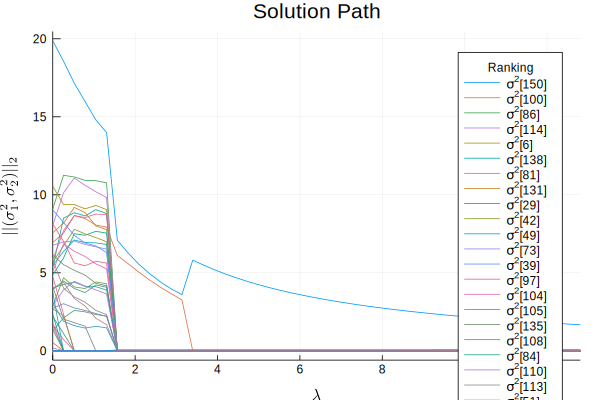

In [40]:
plotsolpath(Σ̂path, Σ̂intpath, λpath)

Since the legend contains too many values, we limit it to 15.

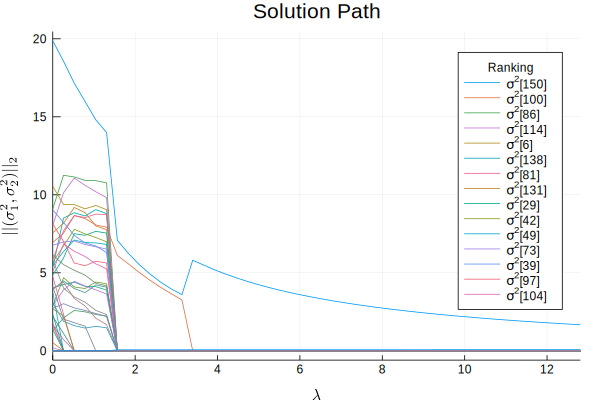

In [41]:
plotsolpath(Σ̂path, Σ̂intpath, λpath; nranks=15)